<h4>Explore how weather affects GDP in agriculturally based economies</h4>

In [1]:
#import dependencies
import requests 
import json
from pprint import pprint
import os
import pandas as pd
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [4]:
# Read in Merged GDP, Weather, and Temperature Data
path_weather_temperature = os.path.join("Resources", "Merge_data_2005-2015.csv")
df = pd.read_csv(path_weather_temperature)
df["ISO3"] = df["ISO3"].astype("string")
df.head()

,Unnamed: 0,ISO3,Country,Year,Temp_Farenheit,Rainfall_mm,GDP
0,0,AFG,Afghanistan,2005,56.087945,29.609967,6.209138e+09
1,1,AFG,Afghanistan,2006,57.501470,27.120458,6.971286e+09
2,2,AFG,Afghanistan,2007,56.320054,25.329681,9.747880e+09
3,3,AFG,Afghanistan,2008,56.755070,21.505365,1.010923e+10
4,4,AFG,Afghanistan,2009,56.807912,31.106477,1.243909e+10


In [9]:
# Filter data showing only top 10 agriculturally based economies 
agricultural_ISO3 = ["SLE", "TCD", "GNB", "COM", "CAF", "MLI", "NER", "SDN", "BDI", "ETH"]
agricultural_df = df[df.ISO3.isin(agricultural_ISO3)]


agricultural_df.head(100)



,Unnamed: 0,ISO3,Country,Year,Temp_Farenheit,Rainfall_mm,GDP
297,297,BDI,Burundi,2005,70.857170,89.670074,1.117113e+09
298,298,BDI,Burundi,2006,69.521495,113.152843,1.273375e+09
299,299,BDI,Burundi,2007,69.279200,108.497519,1.356199e+09
300,300,BDI,Burundi,2008,69.045200,99.705089,1.611836e+09
301,301,BDI,Burundi,2009,70.191065,103.759156,1.781455e+09
...,...,...,...,...,...,...,...
1657,1690,SLE,Sierra Leone,2012,79.433570,201.897354,3.801863e+09
1658,1691,SLE,Sierra Leone,2013,79.832525,207.018927,4.920343e+09
1659,1692,SLE,Sierra Leone,2014,79.657835,186.648337,5.015158e+09
1660,1693,SLE,Sierra Leone,2015,79.951400,217.161513,4.218724e+09


Text(0, 0.5, 'GDP($)')

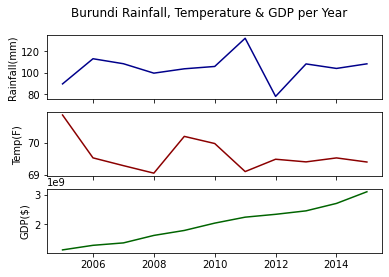

In [46]:
# Create a graph of GDP and Temp changes over time
burundi_df = agricultural_df[agricultural_df["ISO3"] == "BDI"]
x_values = burundi_df["Year"]
y1_values = burundi_df["Rainfall_mm"]
y2_values = burundi_df["Temp_Farenheit"]
y3_values = burundi_df["GDP_M"]

# fig = plt.figure(figsize=(15,5))
# ax1 = fig.add_subplot(1,2,1)
# ax2 = fig.add_subplot(1,2,2)
# # ax3 = fig.add_subplot(1,2,3)

# ax1.plot(x_values, y1_values, color='DarkBlue')
# ax1.set_title('Burundi Annual Rainfall vs Time')
# ax1.set_xlabel('Time (yr)')
# ax1.set_ylabel('Rainfall (mm)')

# ax2.plot(x_values, y2_values, color='DarkGreen')
# ax2.set_title('Burundi Temperature vs Time')
# ax2.set_xlabel('Time (yr)')
# ax2.set_ylabel('Temp (F)')

# # ax3.plot(x_values, y3_values, color='DarkRed')
# # ax3.set_title('Burundi GDP vs Time')
# # ax3.set_xlabel('Time (yr)')
# # ax3.set_ylabel('GDP ($)')

# return fig

fig, axs = plt.subplots(3, sharex=True, sharey=False)
fig.suptitle('Burundi Rainfall, Temperature & GDP per Year')
axs[0].plot(x_values, y1_values, color='DarkBlue', label='Rainfall(mm)')
axs[1].plot(x_values, y2_values, color='DarkRed', label='Temp(F)')
axs[2].plot(x_values, y3_values, color='DarkGreen', label='GDP($)')
axs[0].set_ylabel('Rainfall(mm)')
axs[1].set_ylabel('Temp(F)')
axs[2].set_ylabel('GDP(millions,$)')
# return fig

# fig = plt.figure(figsize=(15,5))
# ax1 = fig.add_subplot(1,2,1)
# ax2 = fig.add_subplot(1,2,2)

# ax1.plt.scatter(x_values, y1_values, color='DarkBlue', s=40)
# ax1.set_title('Burundi Annual Rainfall vs Time')
# ax1.set_xlabel('Time (yr)')
# ax1.set_ylabel('Rainfall (mm)')

# ax2.plt.scatter(x_values, y2_values, color='DarkGreen', s=40)
# ax2.set_title('Burundi GDP vs Time')
# ax2.set_xlabel('Time (yr)')
# ax2.set_ylabel('GDP ($)')

# plt.figure(figsize=(8,5))
# plt.scatter(x_values, y_values, color='DarkBlue', s=40)
# plt.title("Burundi Annual Temp")
# plt.xlabel("Time (yr)")
# plt.ylabel("Rainfall (mm)")
# plt.


# ax=burundi_df.plot(kind='scatter', x=burundi_df["Year"], y=burundi_df["Rainfall_mm"], 
#            color='DarkBlue', style='.', markersize=5, label='Rainfall_mm')

# burundi_df.plot(kind='scatter', x=burundi_df["Year"], y=burundi_df["GDP"], secondary_y=True,
#     color='Red', style='.', markersize=5, label='GDP', ax=ax)
# plt.show()